## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [3]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [6]:
# Replace zero values with NaN in specified columns
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[columns_to_replace] = diabetes_data[columns_to_replace].replace(0, np.nan)

# Verify the replacement
diabetes_data[columns_to_replace].isnull().sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

**<font color='teal'> Plot histograms of each column. </font>**

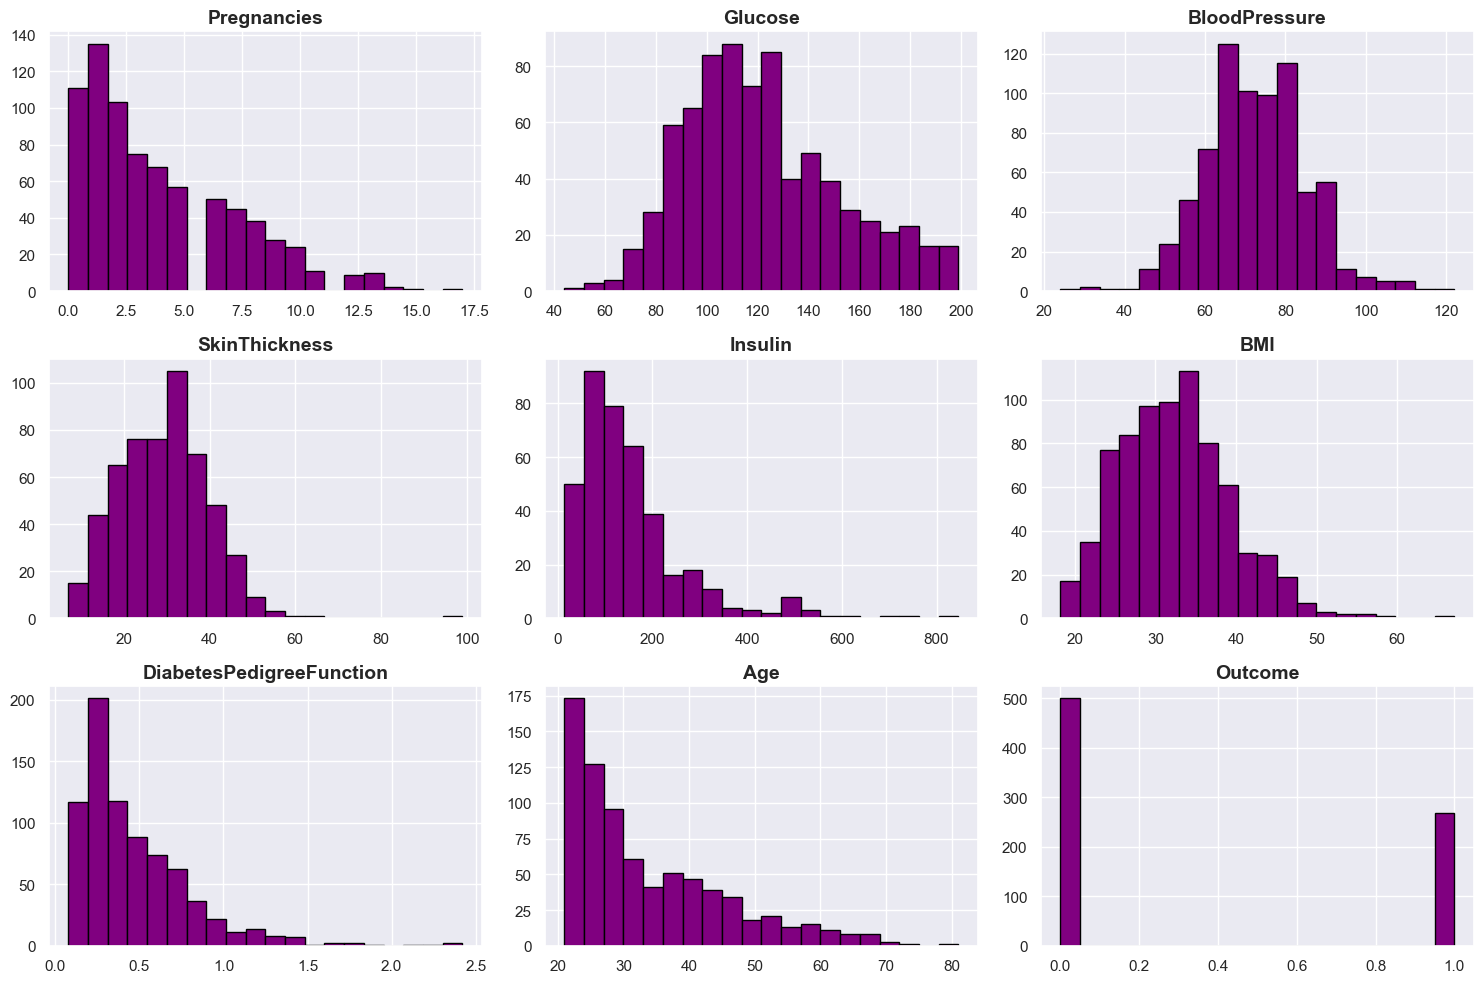

In [8]:
# Plot histograms of each column with the specified colors and formatting
diabetes_data.hist(bins=20, figsize=(15, 10), color=['purple'], edgecolor='black')

# Adjust titles and layout
for ax in plt.gcf().axes:
    ax.set_title(ax.get_title(), fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


#### Replace the zeros with mean and median values.

In [9]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

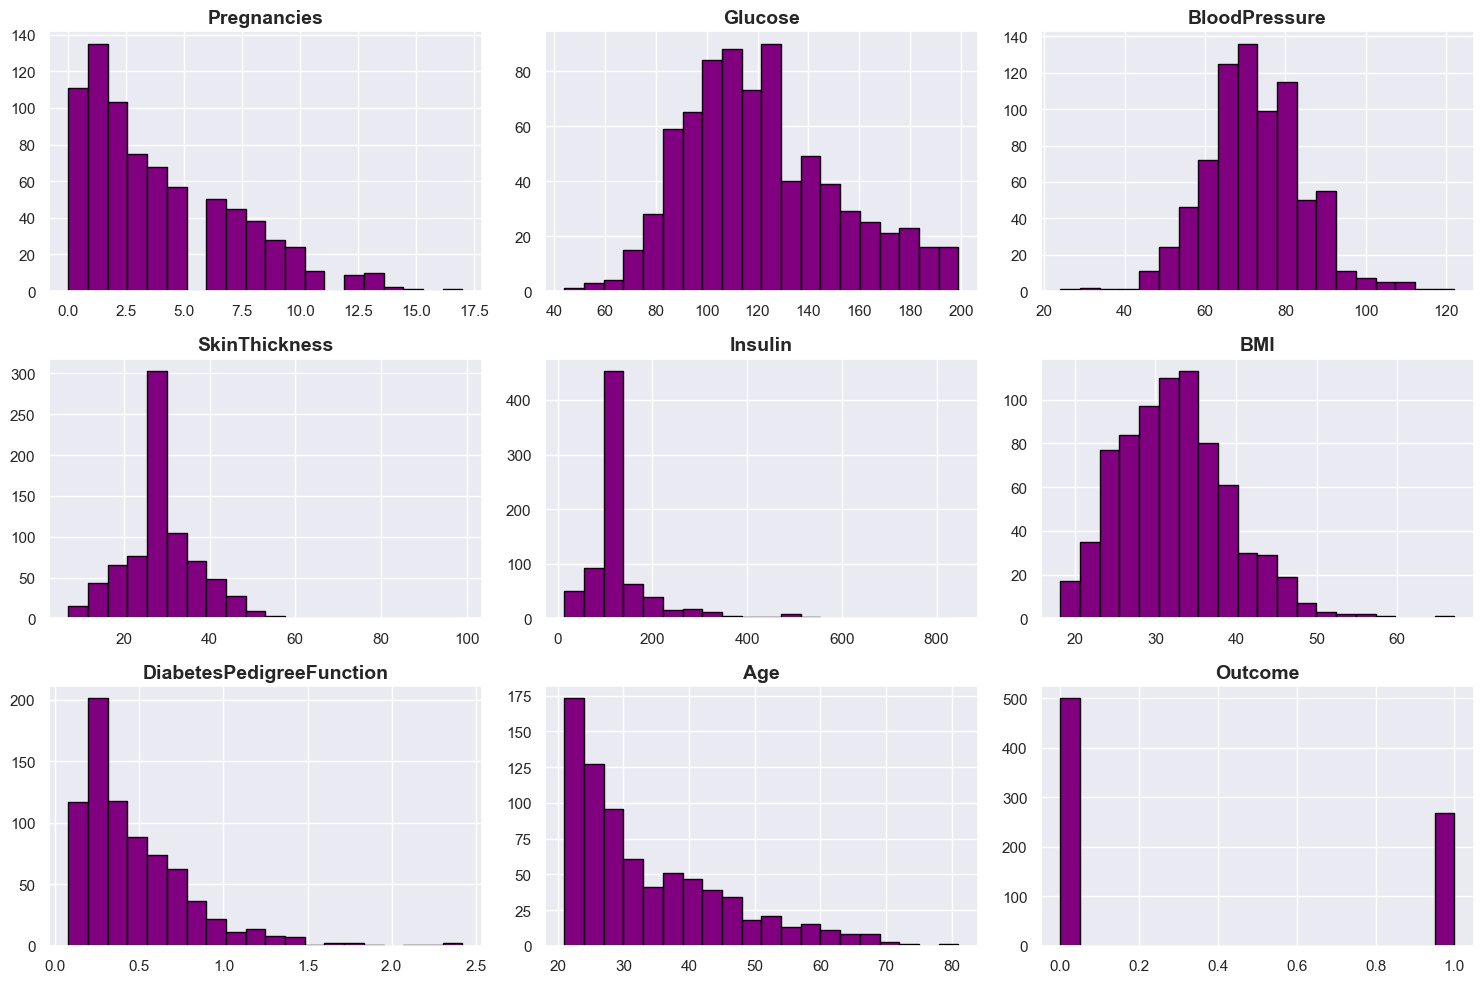

In [10]:
# Plot histograms of each column with the specified colors and formatting
diabetes_data.hist(bins=20, figsize=(15, 10), color='purple', edgecolor='black')

# Adjust titles and layout
for ax in plt.gcf().axes:
    ax.set_title(ax.get_title(), fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


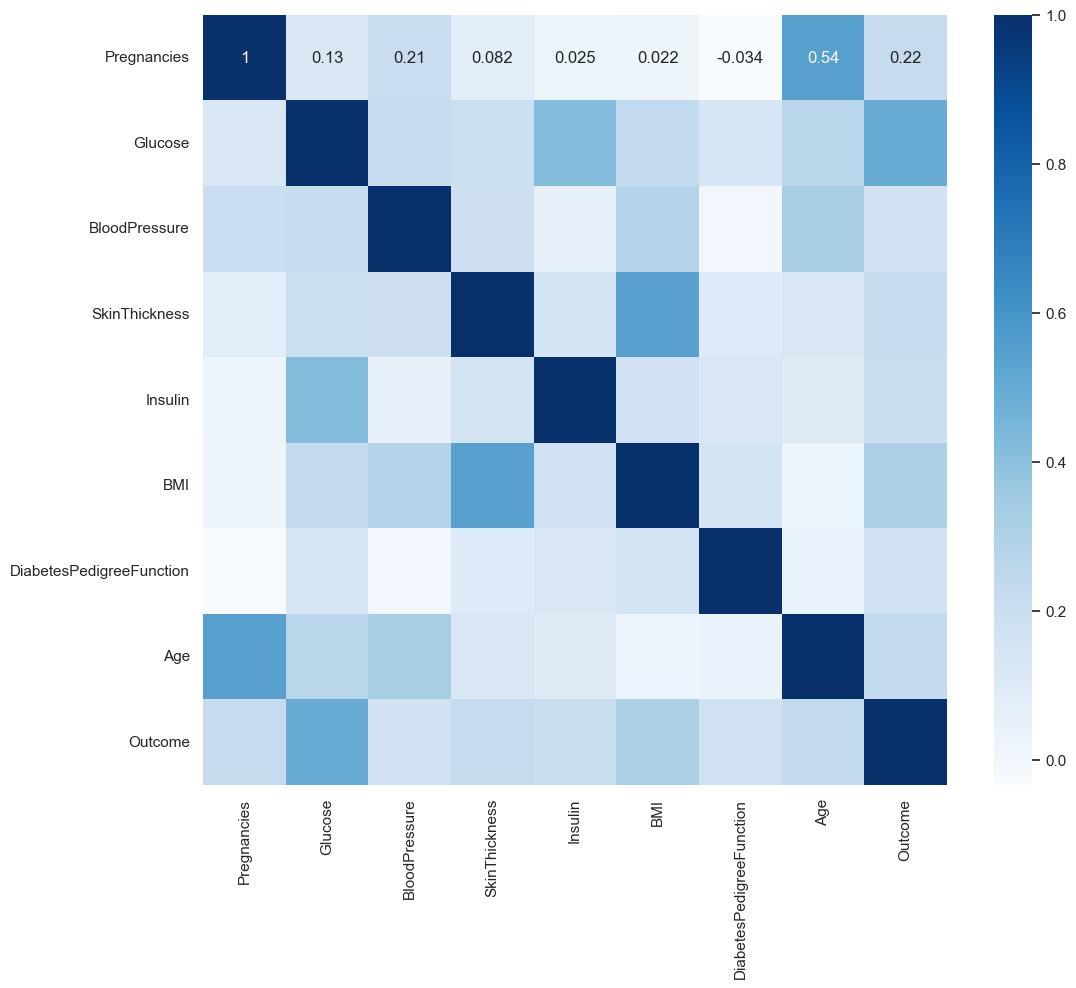

In [11]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [12]:
# Define the y variable as the Outcome column
y = diabetes_data['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [13]:
from sklearn.model_selection import train_test_split

# Define the feature variables (X) and target variable (y)
X = diabetes_data.drop(columns=['Outcome'])
y = diabetes_data['Outcome']

# Create a 70/30 train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed_number)

# Verify the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the scaling
print("Scaled X_train:", X_train_scaled)
print("Scaled X_test:", X_test_scaled)

Scaled X_train: [[-0.8362943  -0.89610788 -1.00440048 ... -1.20382556 -0.61421636
  -0.94861028]
 [ 0.39072767 -0.56399695 -0.02026586 ...  0.66449801 -0.90973787
  -0.43466673]
 [-1.14304979  0.43233584 -0.34831073 ...  1.44057087 -0.30699103
  -0.77729576]
 ...
 [ 1.92450513 -0.69684133  1.12789121 ...  1.91483763  1.94892066
   0.42190587]
 [-1.14304979  0.63160239  0.01296379 ...  1.45494259 -0.77514391
  -0.34900947]
 [-1.14304979  0.10022491  1.9480034  ... -1.40502964 -0.60836445
  -1.03426754]]
Scaled X_test: [[ 0.69748316 -0.79647461 -1.16842292 ...  0.24771813 -0.11680393
   0.85019217]
 [-0.52953881 -0.3315193   0.2257678  ...  0.49203737 -0.94192338
  -1.03426754]
 [-0.52953881 -0.46436368 -0.67635561 ... -0.2121769  -0.91266382
  -1.03426754]
 ...
 [-1.14304979  0.16664709  0.63582389 ...  0.57826769  0.97750343
  -0.86295302]
 [ 0.69748316 -0.56399695 -0.1842883  ... -0.2121769  -1.01799822
   0.33624861]
 [ 0.39072767 -1.49390756  0.79984633 ...  0.50640909 -0.91851573
 

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [15]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [18]:
from sklearn.model_selection import GridSearchCV

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Print train and test scores for each iteration
for i in range(len(results)):
    print(f"Iteration {i + 1}:")
    print(f"Train Score: {results['mean_train_score'][i]}")
    print(f"Test Score: {results['mean_test_score'][i]}")
    print()

Iteration 1:
Train Score: 1.0
Test Score: 0.7095534787123572

Iteration 2:
Train Score: 1.0
Test Score: 0.7095534787123572

Iteration 3:
Train Score: 0.8524269528920693
Test Score: 0.7281239183108343

Iteration 4:
Train Score: 1.0
Test Score: 0.7095534787123572

Iteration 5:
Train Score: 0.8589396649861767
Test Score: 0.7429906542056075

Iteration 6:
Train Score: 1.0
Test Score: 0.7392523364485981

Iteration 7:
Train Score: 0.8403014040223342
Test Score: 0.7466943579093112

Iteration 8:
Train Score: 1.0
Test Score: 0.7522845275181724

Iteration 9:
Train Score: 0.843570228221391
Test Score: 0.759761163032191

Iteration 10:
Train Score: 1.0
Test Score: 0.7560574593284872

Iteration 11:
Train Score: 0.8179660649428092
Test Score: 0.7578573901003807

Iteration 12:
Train Score: 1.0
Test Score: 0.7597092419522327

Iteration 13:
Train Score: 0.8310044993765924
Test Score: 0.7671858774662513

Iteration 14:
Train Score: 1.0
Test Score: 0.7634821737625475

Iteration 15:
Train Score: 0.8147135035

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [19]:
# Find the index of the maximum train score
best_train_score_index = results['mean_train_score'].idxmax()

# Get the corresponding number of neighbors
best_n_neighbors = results.loc[best_train_score_index, 'param_n_neighbors']

print(f"The number of neighbors that resulted in the max score in the training dataset is: {best_n_neighbors}")

The number of neighbors that resulted in the max score in the training dataset is: 1


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [20]:
# Find the index of the maximum test score
best_test_score_index = results['mean_test_score'].idxmax()

# Get the corresponding number of neighbors
best_n_neighbors_test = results.loc[best_test_score_index, 'param_n_neighbors']

print(f"The number of neighbors that resulted in the max score in the testing dataset is: {best_n_neighbors_test}")

The number of neighbors that resulted in the max score in the testing dataset is: 11


Plot the train and test model performance by number of neighbors.

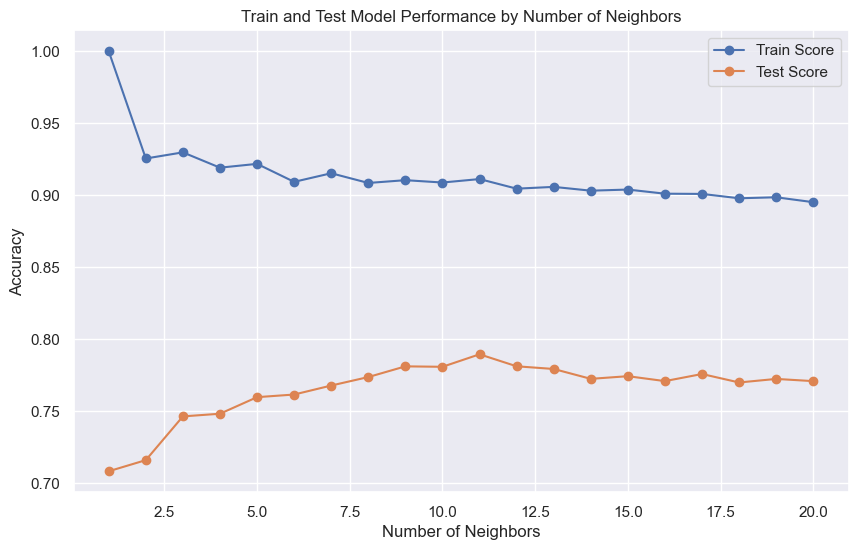

In [22]:
# Extract the number of neighbors, train scores, and test scores from the results
neighbors = results['param_n_neighbors'].astype(int)
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']

# Group by number of neighbors to ensure one value per neighbor count
train_scores_grouped = train_scores.groupby(neighbors).mean()
test_scores_grouped = test_scores.groupby(neighbors).mean()

# Plot the train and test scores by number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(train_scores_grouped.index, train_scores_grouped, label='Train Score', marker='o', linestyle='-')
plt.plot(test_scores_grouped.index, test_scores_grouped, label='Test Score', marker='o', linestyle='-')

# Customize the plot
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Train and Test Model Performance by Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [23]:
# Find the number of neighbors that resulted in the maximum test score
best_n_neighbors_test = test_scores_grouped.idxmax()

# Initialize the KNN classifier with the best number of neighbors
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors_test)

# Fit the model on the training data
best_knn.fit(X_train_scaled, y_train)

# Score the model on the training and test data
train_score = best_knn.score(X_train_scaled, y_train)
test_score = best_knn.score(X_test_scaled, y_test)

print(f"The best number of neighbors based on the plot is: {best_n_neighbors_test}")
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

The best number of neighbors based on the plot is: 11
Train Score: 0.8212290502793296
Test Score: 0.7186147186147186


**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

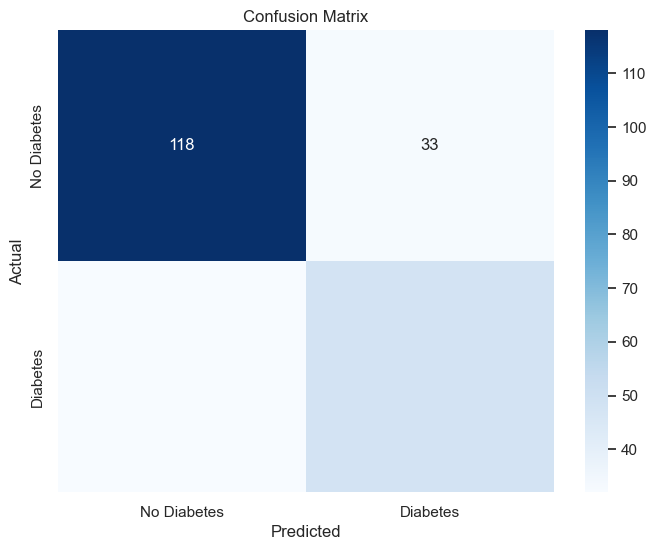

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the test data
y_pred = best_knn.predict(X_test_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**<font color='teal'> Print the classification report </font>**

In [26]:
from sklearn.metrics import classification_report

# Generate the classification report
classification_report_result = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(classification_report_result)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       151
           1       0.59      0.60      0.60        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print(f"Best parameters: {best_params}")

# Print the best score
best_score = grid_search.best_score_
print(f"Best cross-validated score: {best_score}")

# Fit the model with the best parameters on the entire training data
best_knn = grid_search.best_estimator_

# Score the best model on the test data
test_score = best_knn.score(X_test_scaled, y_test)
print(f"Test score with best parameters: {test_score}")

Best parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validated score: 0.7951021114572516
Test score with best parameters: 0.7186147186147186


#### Print the best score and best parameter for n_neighbors.

In [28]:
print("Best Score: " + str(grid_search.best_score_))
print("Best Parameters: " + str(grid_search.best_params_))

Best Score: 0.7951021114572516
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=random_seed_number)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': range(10, 201, 10),  # Test a range of values for the number of estimators
    'max_features': ['sqrt', 'log2', None],  # Test different values for max features
    'max_depth': [None, 10, 20, 30, 40, 50],  # Test different values for max depth
    'min_samples_split': [2, 5, 10],  # Test different values for min samples split
    'min_samples_leaf': [1, 2, 4]  # Test different values for min samples leaf
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)

# Fit the model
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Print the best parameters
print(f"Best parameters: {best_params_rf}")

# Print the best score
best_score_rf = grid_search_rf.best_score_
print(f"Best cross-validated score: {best_score_rf}")

# Fit the model with the best parameters on the entire training data
best_rf = grid_search_rf.best_estimator_

# Score the best model on the test data
test_score_rf = best_rf.score(X_test_scaled, y_test)
print(f"Test score with best parameters: {test_score_rf}")